#Funções acessórias.


In [1]:
#Função instalar pacotes
InstalaPacotes = function(pacote){
  if (pacote %in% rownames(installed.packages())){
    mensagem <- paste("Pacote", pacote, "Já Instalado")
  }else{
    mensagem <- paste("Instalando Pacote", pacote, dependencies = TRUE)
    #install.packages(pacote)  
    install.packages(pacote, repos='http://cran.us.r-project.org' )

  }
  return(mensagem)  
}


In [2]:
print.comparacao.grafico <- function(dados, coluna.comparacao){
  
  i <- 1
  comparacao <- coluna.comparacao
  while (comparacao + (i*4) - 4 < ncol(dados)) {
    fim <- ((i*4)+comparacao)
    if(fim > ncol(dados)){
      fim <- ncol(dados)
    }
    
    inicio <- ((i*4)-comparacao+1)
    print(ggpairs(data=dados, columns=c(comparacao, inicio:fim),
                  mapping = aes(color = "dark green"),
                  axisLabels="show"))
    i <- i+1
    
  }
  
}

print.plot.comparacoes <- function (dados, coluna.principal, colunas.comparaveis){
  
  for(i in length(colunas.comparaveis)){
    y <- colnames(dados)[colunas.comparaveis[i]]
    x <- colnames(dados)[coluna.principal]
    txt <- paste0(x, " vs ", y)
    plot(dados[,coluna.principal], dados[,colunas.comparaveis],
         main=txt,
         xlab=x, 
         ylab=y
         ,col= "dark green" )  
    
  }
  
  
}

# OUTLIER REMOVAL
outliers.boxplot <- function(data, clabel, alpha = 1.5, recursive = FALSE)
{
  org = nrow(data)
  q = as.data.frame(lapply(data, quantile))
  n = ncol(data)
  for (i in 1:n)
  {
    if (colnames(data[i]) == clabel)
    {
      next
    }
    IQR = q[4,i] - q[2,i]
    lq1 = q[2,i] - alpha*IQR
    hq3 = q[4,i] + alpha*IQR
    cond = data[,i] >= lq1 & data[,i] <= hq3
    data = data[cond,]
  }
  final = nrow(data)
  if ((recursive) & (final != org))
    return (outliers.boxplot(data, alpha, recursive))
  else
    return (data)
}


# NORMALIZACAO MIN-MAX
normalize.minmax <- function(data, norm.set=NULL)
{
  data = data.frame(data)
  if(is.null(norm.set))
  {
    minmax = data.frame(t(sapply(data, max, na.rm=TRUE)))
    minmax = rbind(minmax, t(sapply(data, min, na.rm=TRUE)))
  }
  else {
    minmax = norm.set
  }
  data = rbind(data, minmax)
  normalize_minmax <- function(x)
  {
    maxd = x[length(x)-1]
    mind = x[length(x)]
    return ((x-mind)/(maxd-mind))
  }
  data = data.frame(sapply(data, normalize_minmax))
  data = data[1:(nrow(data)-2),]
  return (list(data, minmax))
}

      
      
reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd)
  cormat <-cormat[hc$order, hc$order]
}

get_lower_tri<-function(cormat){
  cormat[upper.tri(cormat)] <- NA
  return(cormat)
}
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
  cormat[lower.tri(cormat)]<- NA
  return(cormat)
}  

In [3]:
InstalaPacotes("GGally")
InstalaPacotes("ggplot2")
InstalaPacotes("hydroGOF")
InstalaPacotes("mvtnorm")
InstalaPacotes("lubridate")
InstalaPacotes("leaps")
InstalaPacotes("ISLR")
InstalaPacotes("reshape2")
InstalaPacotes("ggplot2")



library(GGally)
library(ggplot2)
library(hydroGOF)
library(mvtnorm)
library(lubridate)
library(leaps)
library(ISLR)
library(reshape2)
library(ggplot2)


[1] "Pacote GGally Já Instalado"

[1] "Pacote ggplot2 Já Instalado"

[1] "Pacote hydroGOF Já Instalado"

[1] "Pacote mvtnorm Já Instalado"

[1] "Pacote lubridate Já Instalado"

[1] "Pacote leaps Já Instalado"

[1] "Pacote ISLR Já Instalado"

[1] "Pacote reshape2 Já Instalado"

[1] "Pacote ggplot2 Já Instalado"

Warning message:
"package 'GGally' was built under R version 3.3.3"Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'hydroGOF' was built under R version 3.3.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'leaps' was built under R version 3.3.3"Warning message:
"package 'ISLR' was built under R version 3.3.3"Warning message:
"package 'reshape2' was built under R version 3.3.3"

#Carrega os dados.

In [4]:
#diretorio <- "C:/Users/Wellington Amaral/Google Drive/Mestrado/Mineração de Dados/Trabalho Houses price/dados"
diretorio <-"C:/Users/lelo/Google Drive/Mestrado/Mineração de Dados/Trabalho Houses price/dados"
#diretorio <-"D:/Mineração de Dados/Trabalho Houses price/dados"
#diretorio <- "/home/wellington/Documentos/R/Trabalho Houses price/dados"

preco_casas <-  read.csv(paste0(diretorio, "/kc_house_data.csv"))
preco_casas_original <- preco_casas

#Tratando os dados.

In [5]:
#Removendo registros de IDs duplicados.
preco_casas <- preco_casas[!duplicated(preco_casas$id),]
#Transformando as datas de reforma e construção do imóvel
preco_casas$date<-(substr(preco_casas$date, 1, 8))
#preco_casas$date<- ymd(preco_casas$date)
preco_casas$date <- NULL

In [6]:
#transformando price em log
preco_casas$price_log <- log(preco_casas$price)

preco_casas$bedrooms_log <- log(preco_casas$bedrooms)
preco_casas$bathrooms_log <- log(preco_casas$bathrooms)
preco_casas$floors_log <- log(preco_casas$floors)
#preco_casas$waterfront_log <- log(preco_casas$waterfront)
#preco_casas$view_log <- log(preco_casas$view)
preco_casas$condition_log <- log(preco_casas$condition)
preco_casas$grade_log <- log(preco_casas$grade)
preco_casas$sqft_above_log <- log(preco_casas$sqft_above)
#preco_casas$sqft_basement_log <- log(preco_casas$sqft_basement)

preco_casas$yr_built_log <- log(preco_casas$yr_built)
#preco_casas$yr_renovated_log <- log(preco_casas$yr_renovated)
preco_casas$sqft_living15_log <- log(preco_casas$sqft_living15)
preco_casas$sqft_lot15_log <- log(preco_casas$sqft_lot15)

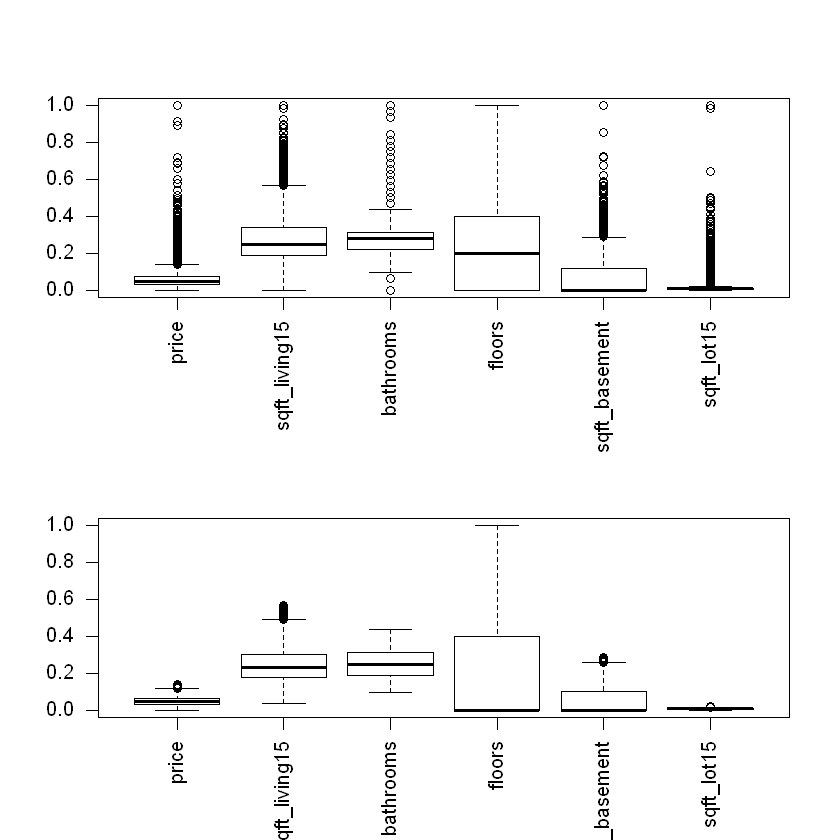

In [7]:
par(mfrow=c(2,1))
normalizado  <- preco_casas
normalizado <- normalize.minmax(normalizado)
normalizado <- data.frame( normalizado[1])
#boxplot(normalizado$price ~ normalizado$)
boxplot(normalizado[,c("price","sqft_living15","bathrooms", "floors", "sqft_basement","sqft_lot15")], las = 2)

n <-  outliers.boxplot (data.frame(normalizado[,
                         colnames(normalizado) %in%  c(
                           "id", "price", "bedrooms", "bathrooms", "floors", "sqft_above", "sqft_basement", "sqft_living15" ,"sqft_lot15")])
 , "id")


normalizado <- normalizado[normalizado$id %in% n$id,]
boxplot(normalizado[,c("price","sqft_living15","bathrooms", "floors", "sqft_basement","sqft_lot15")], las = 2)



#Removendo os outliers e variáveis redudantes.
Após a análise precedente, as variáveis escolhidas para remoção dos outliers serão as:"id", "price", "bedrooms", "bathrooms", , "floors", "sqft_above", "sqft_basement", "sqft_living15" e "sqft_lot15".

In [8]:
n <-  outliers.boxplot (data.frame(preco_casas[,
                         colnames(preco_casas) %in%  c(
                           "id", "price", "bedrooms", "bathrooms", "floors", "sqft_above", "sqft_basement", "sqft_living15" ,"sqft_lot15")])
 , "id")


preco_casas <- preco_casas[preco_casas$id %in% n$id,]

preco_casas$long <- NULL
preco_casas$lat <- NULL

       id                price            bedrooms       bathrooms    
 Min.   :2.800e+06   Min.   :  78000   Min.   :2.000   Min.   :0.750  
 1st Qu.:2.310e+09   1st Qu.: 306000   1st Qu.:3.000   1st Qu.:1.500  
 Median :4.056e+09   Median : 423000   Median :3.000   Median :2.000  
 Mean   :4.745e+09   Mean   : 458793   Mean   :3.274   Mean   :1.996  
 3rd Qu.:7.504e+09   3rd Qu.: 575000   3rd Qu.:4.000   3rd Qu.:2.500  
 Max.   :9.900e+09   Max.   :1127000   Max.   :5.000   Max.   :3.500  
  sqft_living      sqft_lot           floors        waterfront      
 Min.   : 520   Min.   :    520   Min.   :1.000   Min.   :0.000000  
 1st Qu.:1370   1st Qu.:   4800   1st Qu.:1.000   1st Qu.:0.000000  
 Median :1790   Median :   7200   Median :1.000   Median :0.000000  
 Mean   :1868   Mean   :   7906   Mean   :1.473   Mean   :0.001661  
 3rd Qu.:2290   3rd Qu.:   9300   3rd Qu.:2.000   3rd Qu.:0.000000  
 Max.   :4870   Max.   :1164794   Max.   :3.500   Max.   :1.000000  
      view          

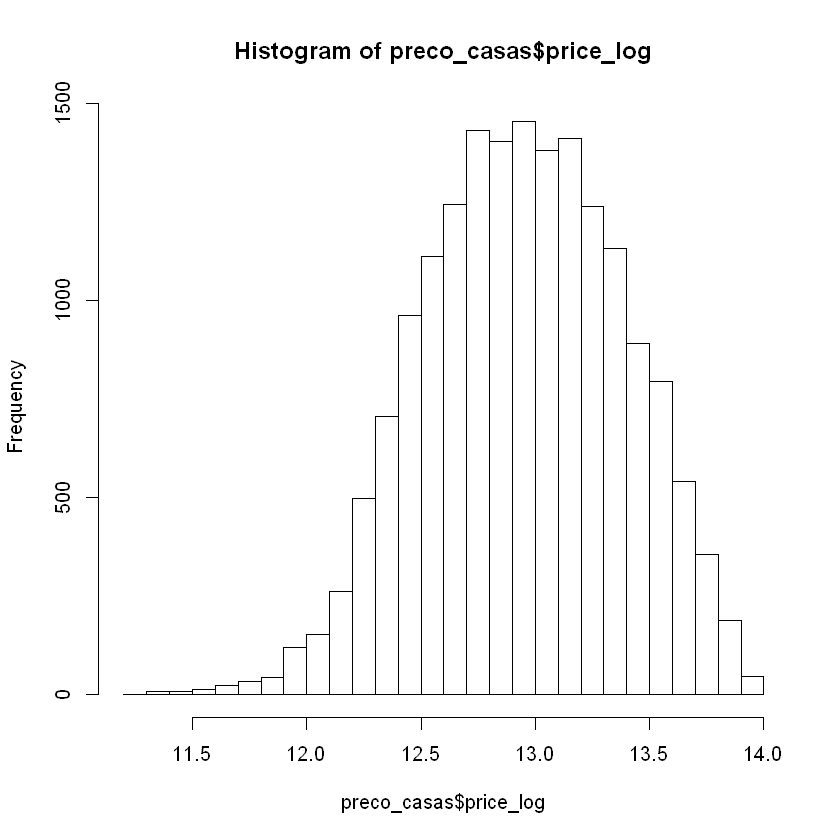

In [9]:
hist(preco_casas$price_log, breaks = 20)
summary(preco_casas)

In [10]:
#Normalizando os dados

preco_casas <- normalize.minmax(preco_casas)
preco_casas <- data.frame( preco_casas[1])

In [11]:
#Separa a base original em 2 conjuntos, teste, treino com proporções 1/3, 2/3 
variacao = sample(1:nrow(preco_casas), size = 0.33*nrow(preco_casas))
preco_casas.teste = preco_casas[variacao,] 
treino = preco_casas[-variacao,] 


In [12]:
summary(treino)
head(treino)


       id                price           bedrooms        bathrooms     
 Min.   :0.0000808   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2335509   1st Qu.:0.2169   1st Qu.:0.3333   1st Qu.:0.2727  
 Median :0.4098130   Median :0.3260   Median :0.3333   Median :0.4545  
 Mean   :0.4807983   Mean   :0.3621   Mean   :0.4231   Mean   :0.4521  
 3rd Qu.:0.7590227   3rd Qu.:0.4714   3rd Qu.:0.6667   3rd Qu.:0.6364  
 Max.   :1.0000000   Max.   :0.9990   Max.   :1.0000   Max.   :1.0000  
  sqft_living        sqft_lot             floors         waterfront      
 Min.   :0.0000   Min.   :0.0000447   Min.   :0.0000   Min.   :0.000000  
 1st Qu.:0.1954   1st Qu.:0.0037027   1st Qu.:0.0000   1st Qu.:0.000000  
 Median :0.2920   Median :0.0057375   Median :0.0000   Median :0.000000  
 Mean   :0.3094   Mean   :0.0063798   Mean   :0.1872   Mean   :0.001453  
 3rd Qu.:0.4069   3rd Qu.:0.0075652   3rd Qu.:0.4000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000000   Max.   :1.0000

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,price_log,bedrooms_log,bathrooms_log,floors_log,condition_log,grade_log,sqft_above_log,yr_built_log,sqft_living15_log,sqft_lot15_log
1,0.72005217,0.13717827,0.3333333,0.09090909,0.15172414,0.004406179,0.0,0,0,0.50,...,0.3914910,0.442507,0.1867526,0.0000000,0.6826062,0.5531982,0.4375506,0.4855978,0.4320916,0.6559516
3,0.56871643,0.09723546,0.0000000,0.09090909,0.05747126,0.008142413,0.0,0,0,0.50,...,0.3131305,0.000000,0.1867526,0.0000000,0.6826062,0.4008153,0.2298967,0.2930184,0.8290065,0.7638672
6,0.13322960,0.17111535,0.3333333,0.54545455,0.27471264,0.005410238,0.4,0,0,0.50,...,0.4472060,0.442507,0.7131785,0.5532948,0.6826062,0.5531982,0.6194322,0.8302545,0.7196533,0.7130373
8,0.24368509,0.14442326,0.3333333,0.09090909,0.28965517,0.005969385,0.0,0,0,0.50,...,0.4041009,0.442507,0.1867526,0.0000000,0.6826062,0.5531982,0.3807705,0.5290636,0.5912830,0.7657814
11,0.01124575,0.22116301,0.3333333,0.09090909,0.20919540,0.016646425,0.2,0,0,0.75,...,0.5166856,0.442507,0.1867526,0.3236567,0.8613531,0.5531982,0.5310261,0.2401162,0.5912830,0.9017429
12,0.61147092,0.30695901,0.3333333,0.36363636,0.19540230,0.007867564,0.0,0,0,0.75,...,0.6121292,0.442507,0.5500345,0.0000000,0.8613531,0.5531982,0.5101752,0.6760223,0.4445049,0.8355091


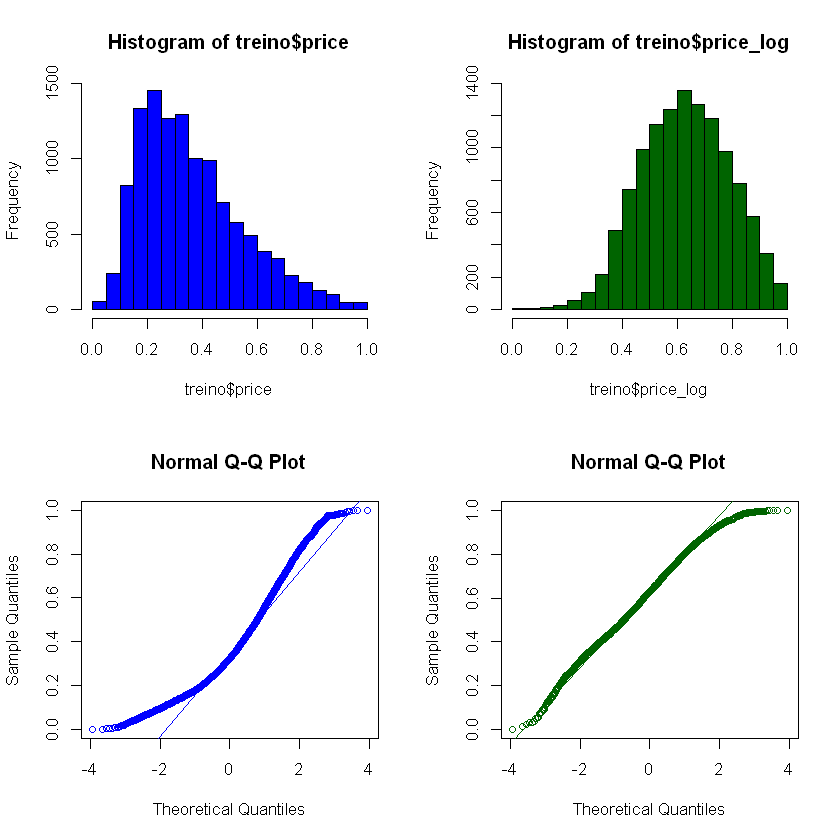

In [13]:

par(mfrow=c(2,2))
hist(treino$price, col = "blue")
hist(treino$price_log, col = "dark green")

qqnorm(treino$price, col = "blue")
qqline(treino$price, col = "blue")

qqnorm (treino$price_log, col = "dark green")
qqline(treino$price_log, col = "dark green")


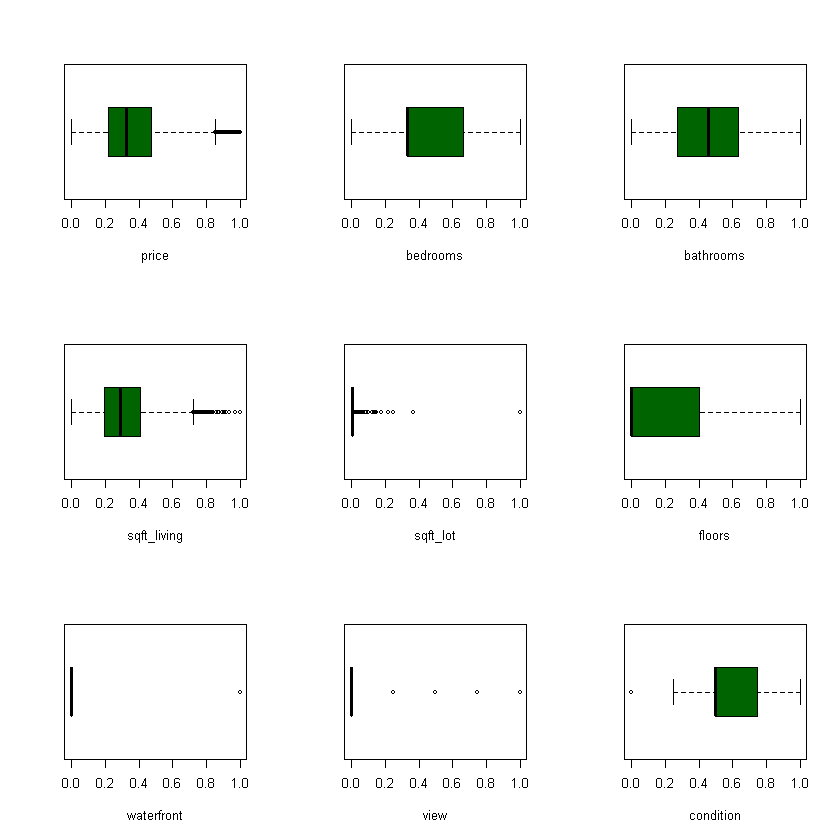

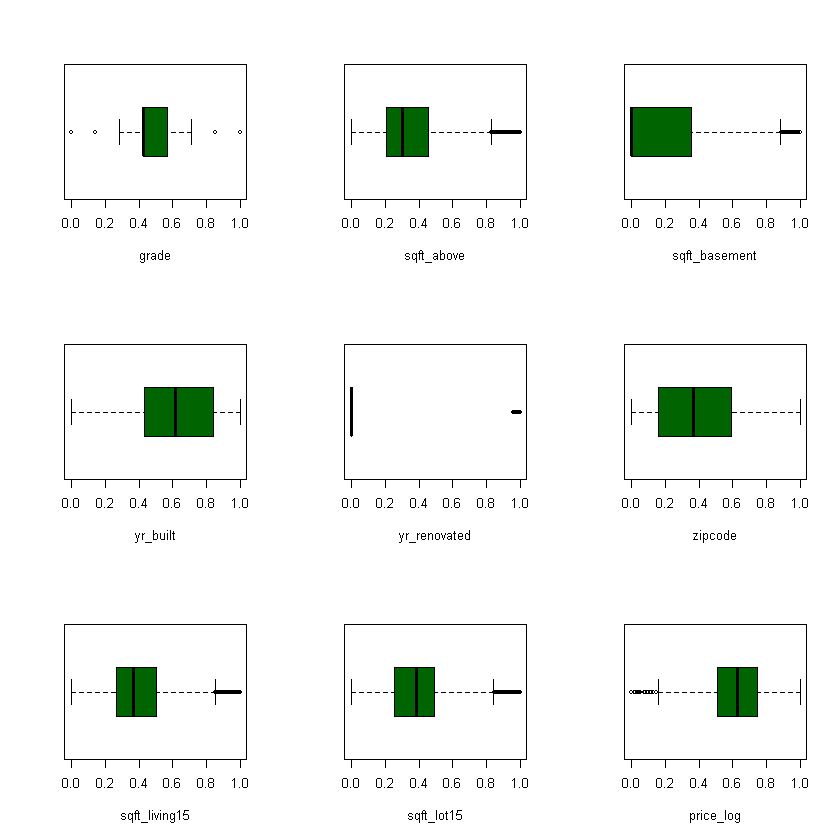

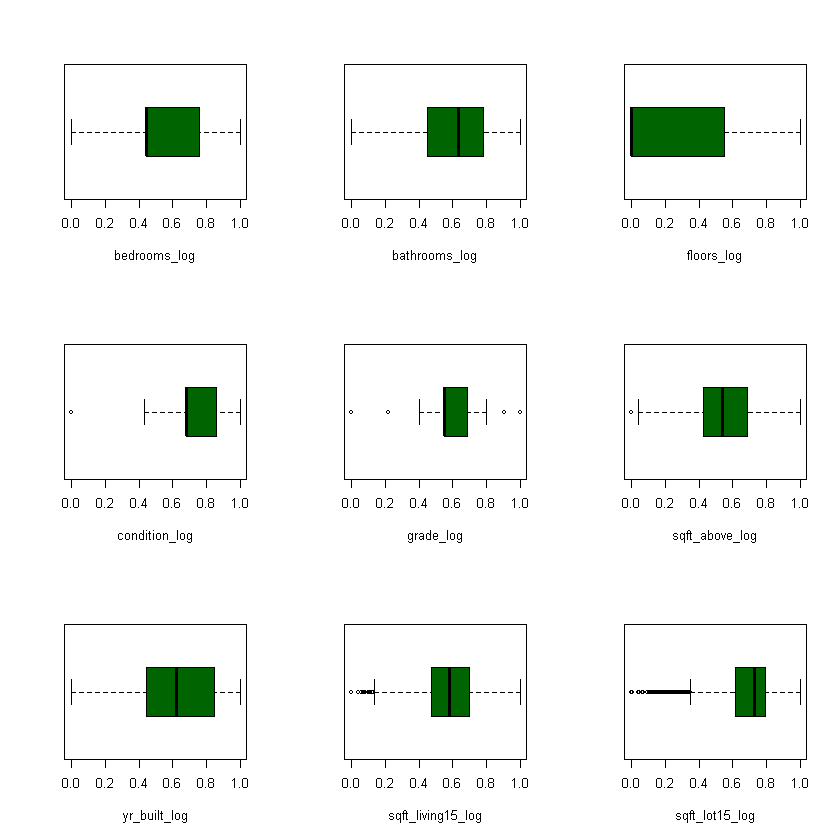

In [14]:
par(mfrow=c(3,3))
for(i in 2 :ncol(treino)){
  boxplot(treino[,i], horizontal = TRUE, col = "dark green",  xlab = colnames(treino)[i] )
}


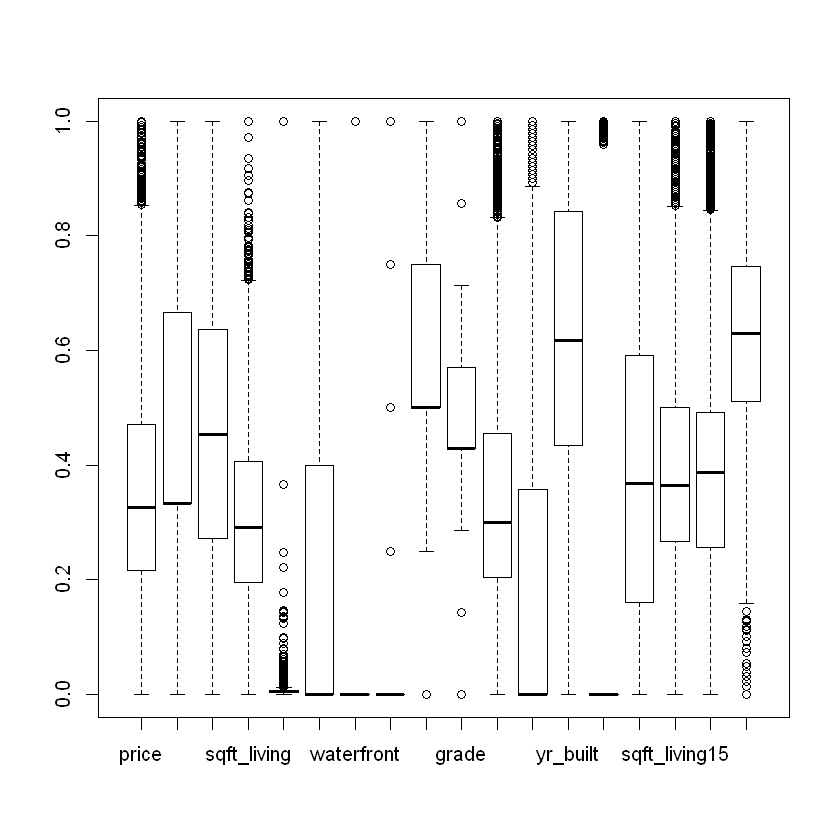

In [15]:
boxplot(treino[,2:19])

## Verificando a relação entre os campos.

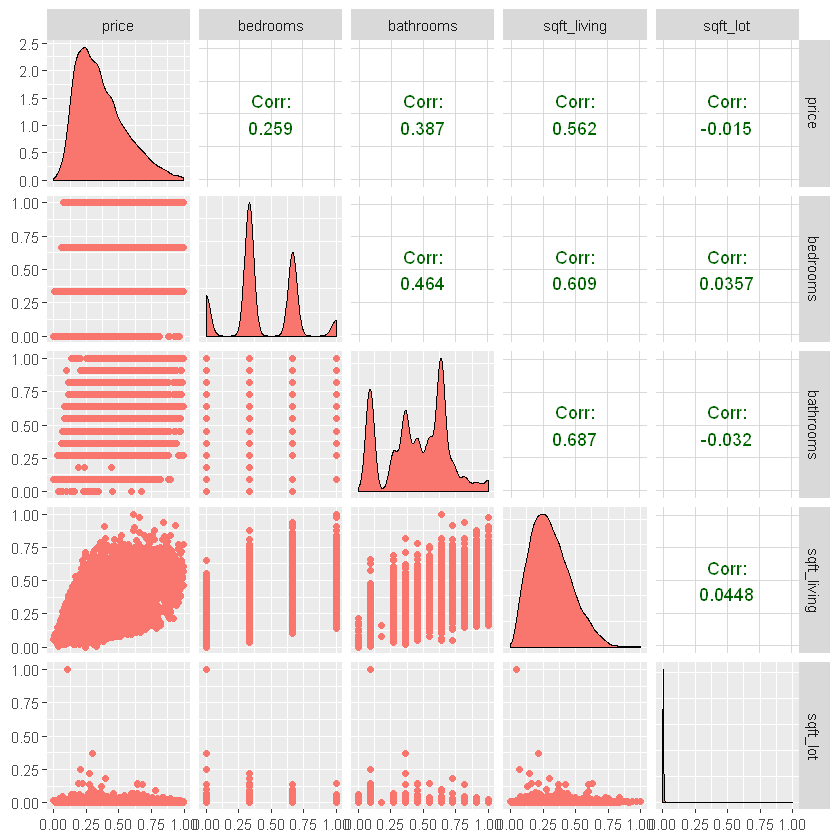

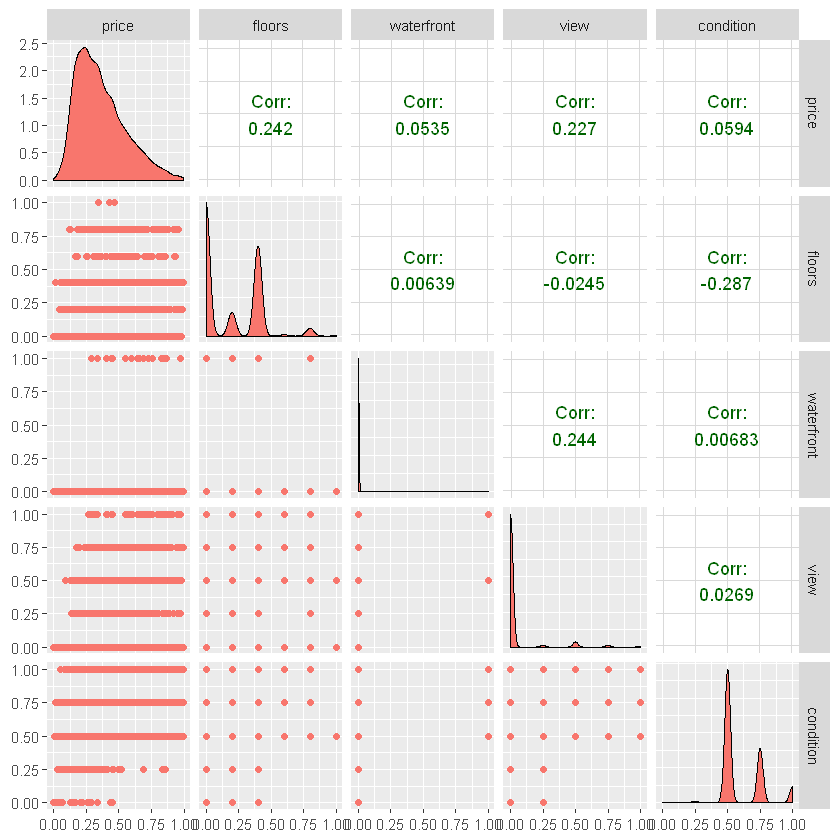

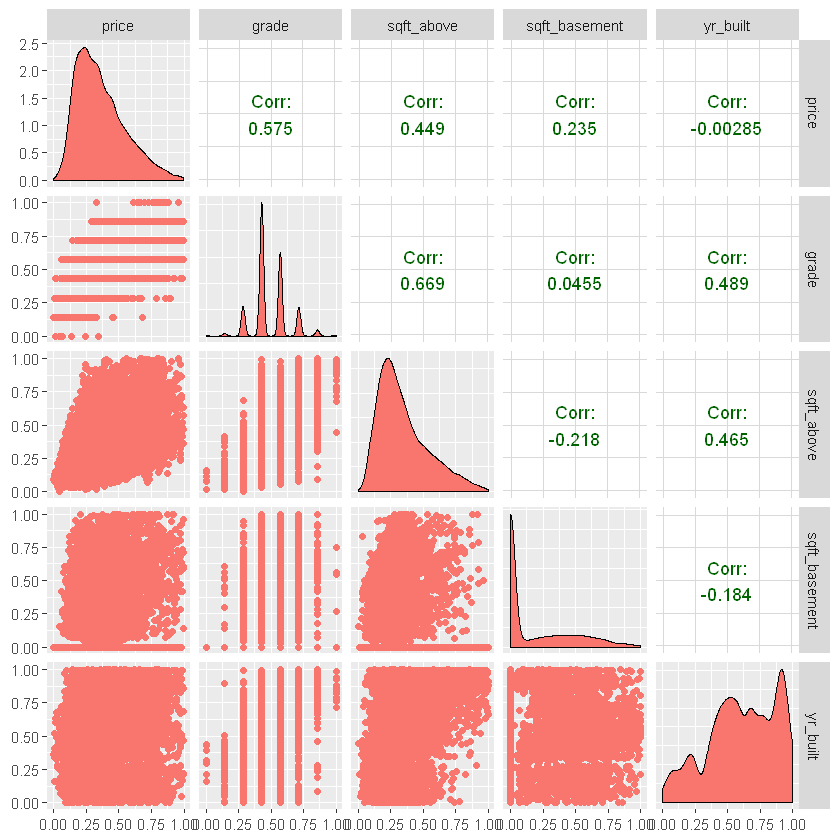

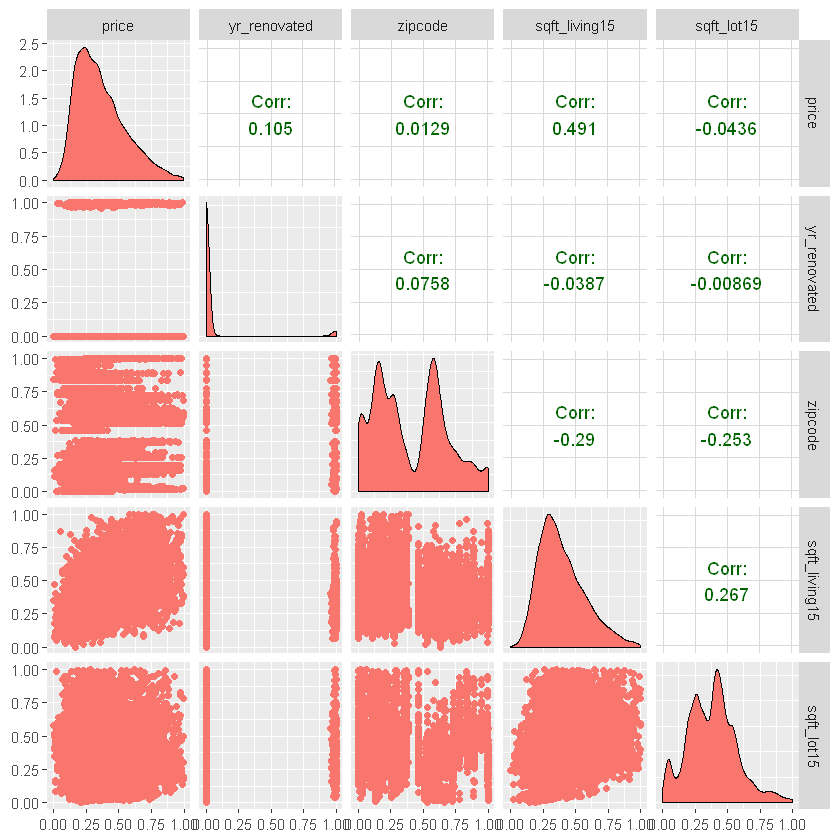

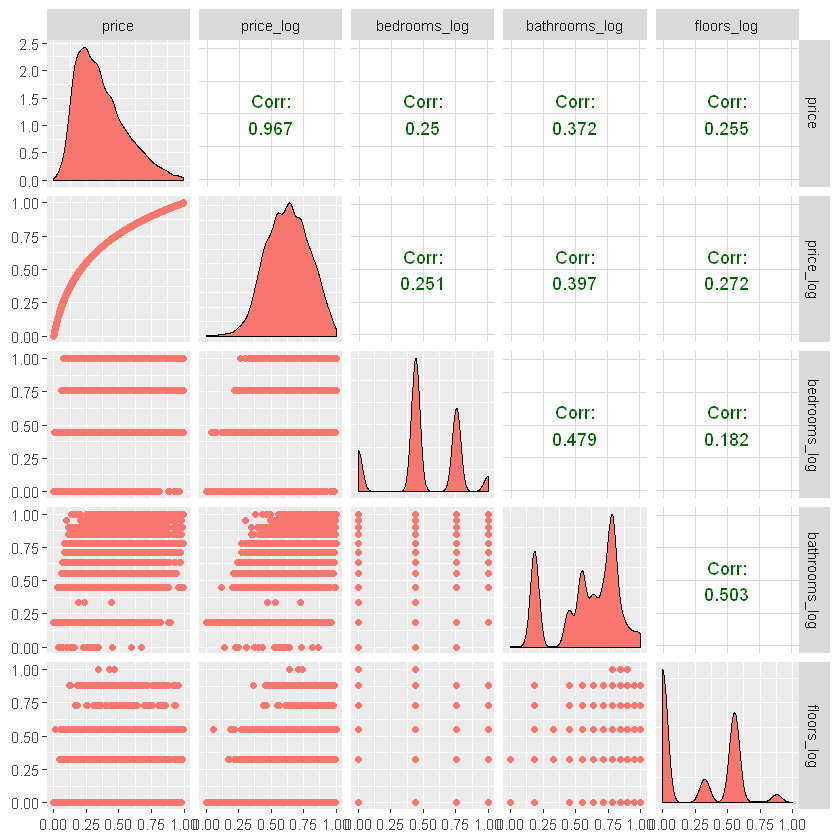

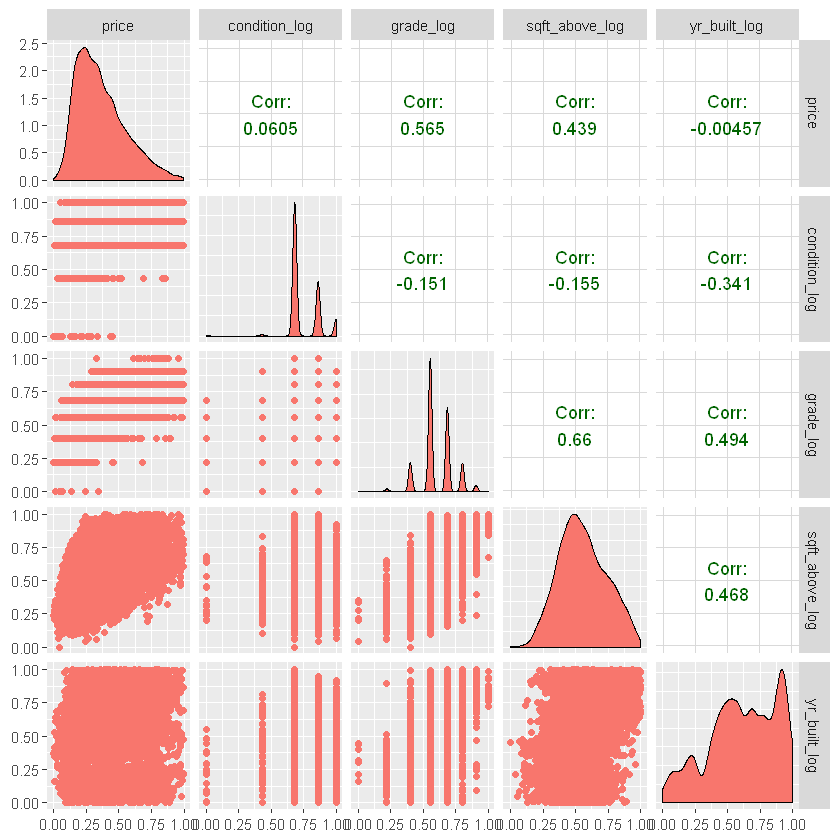

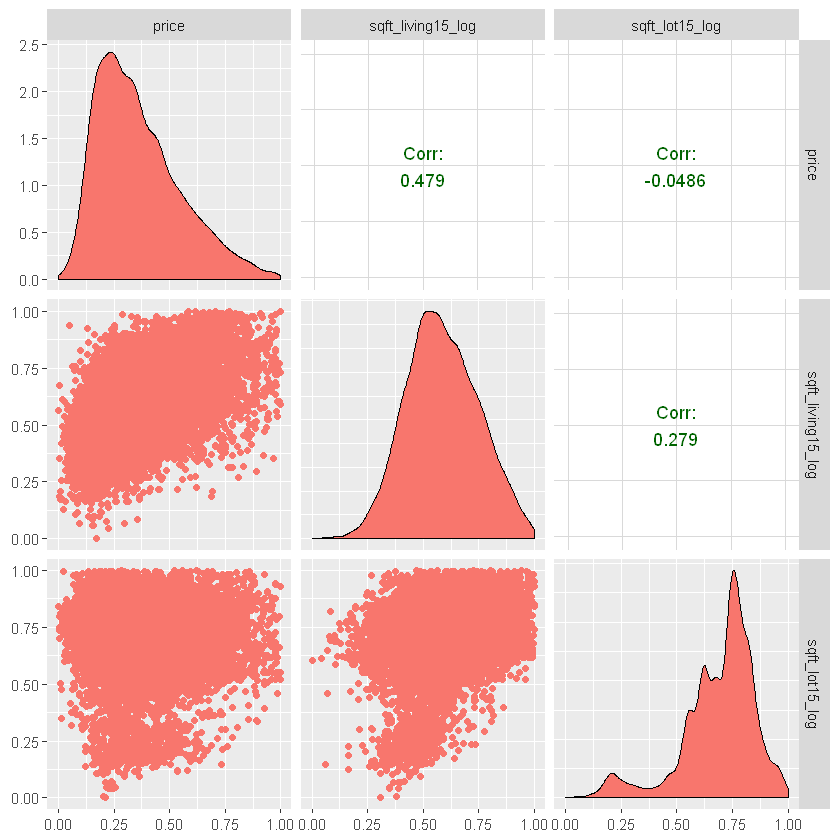

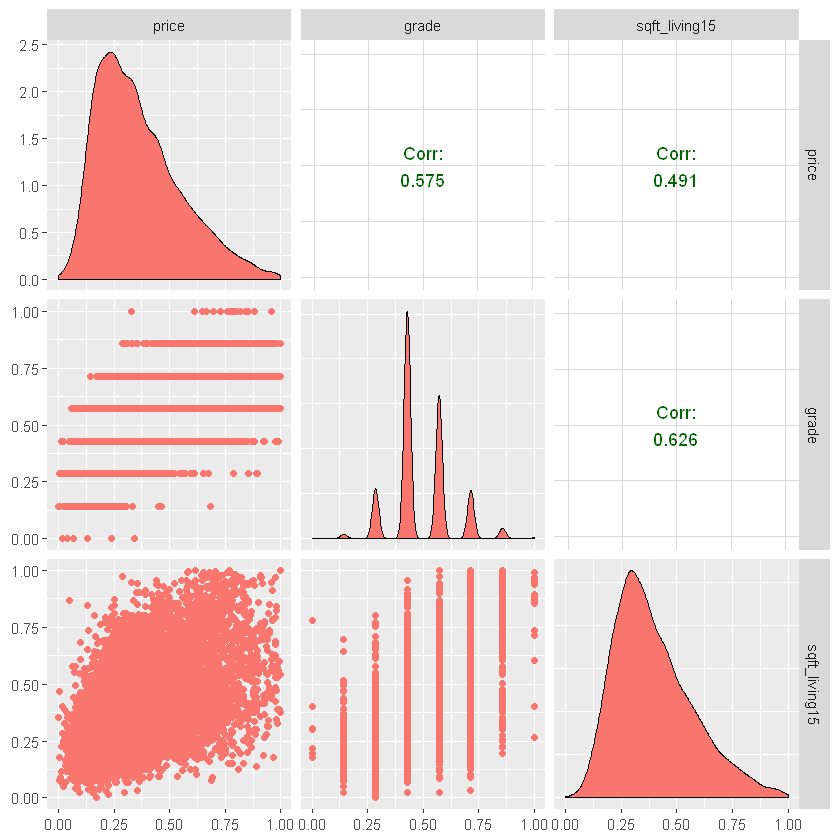

In [16]:
print.comparacao.grafico(treino,2)
print(ggpairs(data=treino, columns=c("price", "grade","sqft_living15"),
                  mapping = aes(color = "dark green"),
                  axisLabels="show"))

In [17]:
#Verificando a correlação entre as variáveis visualmente
correlacao <- data.frame(colnames(treino)[3:ncol(treino)])
for(i in 3:ncol(treino)){
  correlacao [i-2,"cor"] <- cor(treino[,2],treino[,i])
}
correlacao <- correlacao[order(correlacao[,2], decreasing = TRUE),]
correlacao

,colnames.treino..3.ncol.treino..,cor
17,price_log,0.967369528
9,grade,0.574501747
22,grade_log,0.564909463
3,sqft_living,0.562132547
15,sqft_living15,0.490698296
25,sqft_living15_log,0.479113118
10,sqft_above,0.448556511
23,sqft_above_log,0.439452605
2,bathrooms,0.386592826
19,bathrooms_log,0.372032925


#Gráfico mapa de calor de correlação de variáveis.

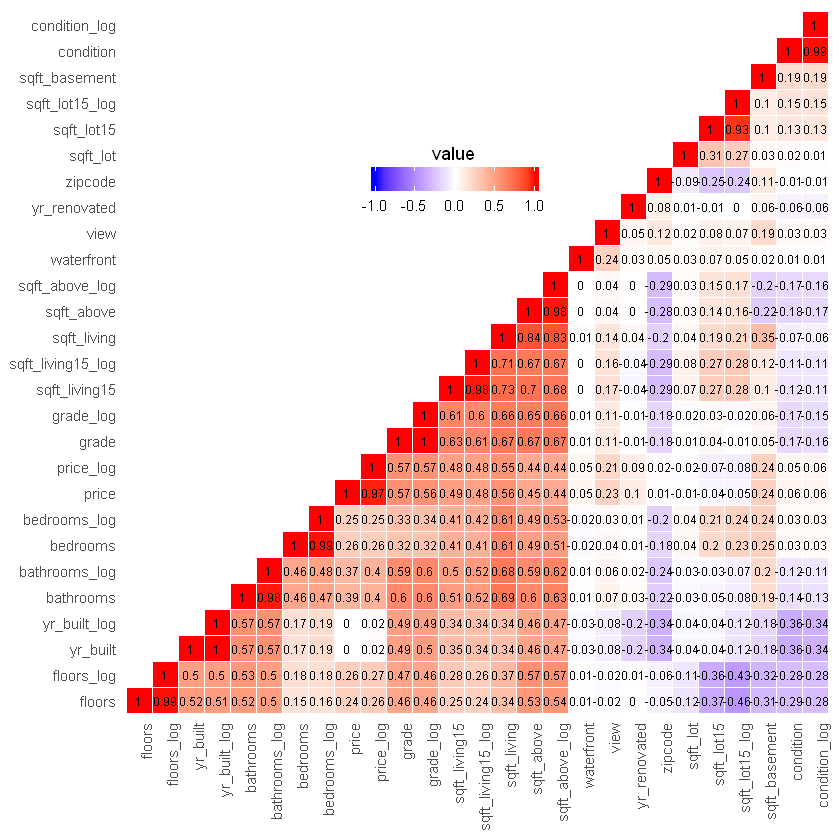

In [18]:

cormat <- round(cor(treino[,2:ncol(treino)]),2)
###########



# Reorder the correlation matrix
cormat <- reorder_cormat(cormat)
upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap

ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab") +
  theme_minimal()+ # minimal theme
  theme(axis.text.x = element_text(angle = 90, vjust = 1, 
                                   size = 9, hjust = 1))+
  coord_fixed()


###################
ggheatmap + 
  geom_text(aes(Var2, Var1, label = value), color = "black", size = 2.5) +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.grid.major = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.ticks = element_blank(),
    legend.justification = c(1, 0),
    legend.position = c(0.6, 0.7),
    legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                               title.position = "top", title.hjust = 0.5))


#Selecionando variáveis


In [19]:
summary(treino)

       id                price           bedrooms        bathrooms     
 Min.   :0.0000808   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2335509   1st Qu.:0.2169   1st Qu.:0.3333   1st Qu.:0.2727  
 Median :0.4098130   Median :0.3260   Median :0.3333   Median :0.4545  
 Mean   :0.4807983   Mean   :0.3621   Mean   :0.4231   Mean   :0.4521  
 3rd Qu.:0.7590227   3rd Qu.:0.4714   3rd Qu.:0.6667   3rd Qu.:0.6364  
 Max.   :1.0000000   Max.   :0.9990   Max.   :1.0000   Max.   :1.0000  
  sqft_living        sqft_lot             floors         waterfront      
 Min.   :0.0000   Min.   :0.0000447   Min.   :0.0000   Min.   :0.000000  
 1st Qu.:0.1954   1st Qu.:0.0037027   1st Qu.:0.0000   1st Qu.:0.000000  
 Median :0.2920   Median :0.0057375   Median :0.0000   Median :0.000000  
 Mean   :0.3094   Mean   :0.0063798   Mean   :0.1872   Mean   :0.001453  
 3rd Qu.:0.4069   3rd Qu.:0.0075652   3rd Qu.:0.4000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000000   Max.   :1.0000

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"1  linear dependencies found"

Reordering variables and trying again:


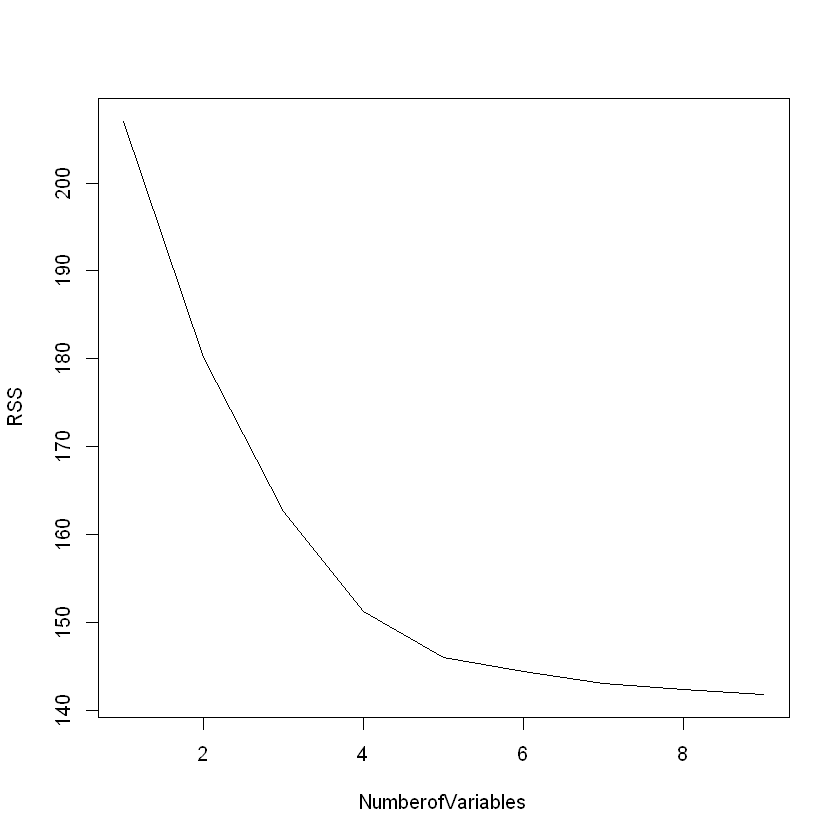

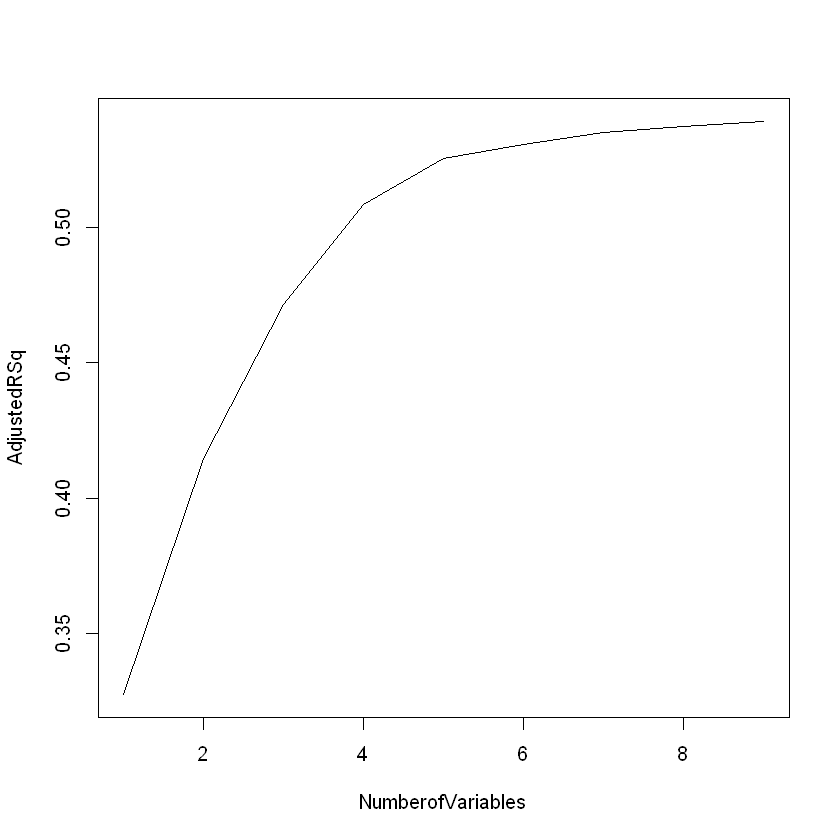

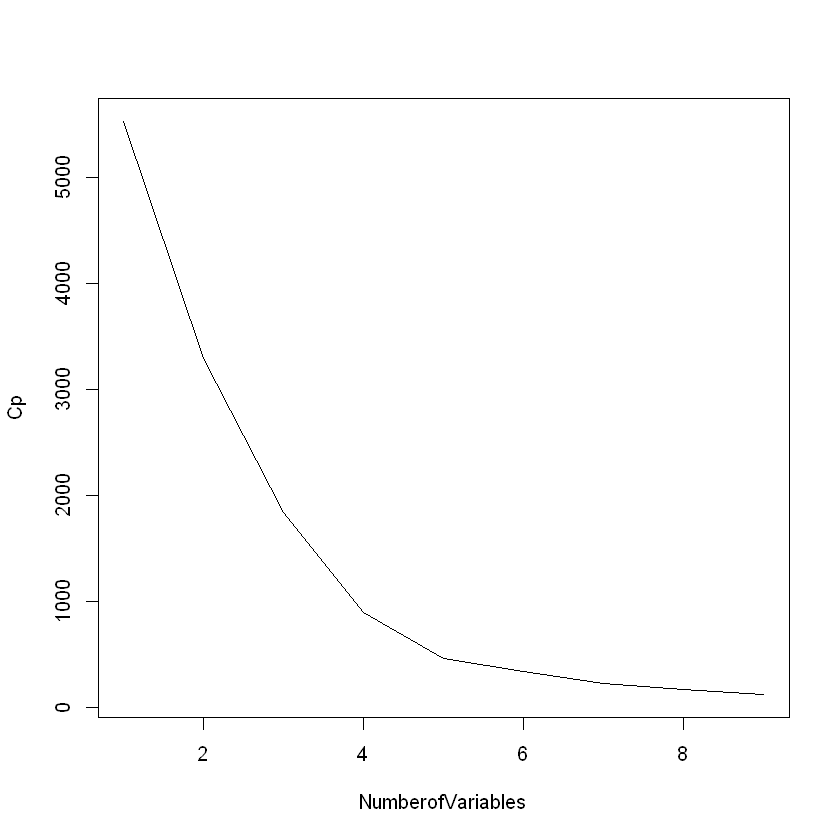

Subset selection object
Call: regsubsets.formula(price_log ~ ., data = sel_variaveis, method = "forward")
25 Variables  (and intercept)
                  Forced in Forced out
bedrooms              FALSE      FALSE
bathrooms             FALSE      FALSE
sqft_living           FALSE      FALSE
sqft_lot              FALSE      FALSE
floors                FALSE      FALSE
waterfront            FALSE      FALSE
view                  FALSE      FALSE
condition             FALSE      FALSE
grade                 FALSE      FALSE
sqft_above            FALSE      FALSE
yr_built              FALSE      FALSE
yr_renovated          FALSE      FALSE
zipcode               FALSE      FALSE
sqft_living15         FALSE      FALSE
sqft_lot15            FALSE      FALSE
bedrooms_log          FALSE      FALSE
bathrooms_log         FALSE      FALSE
floors_log            FALSE      FALSE
condition_log         FALSE      FALSE
grade_log             FALSE      FALSE
sqft_above_log        FALSE      FALSE
yr_bui

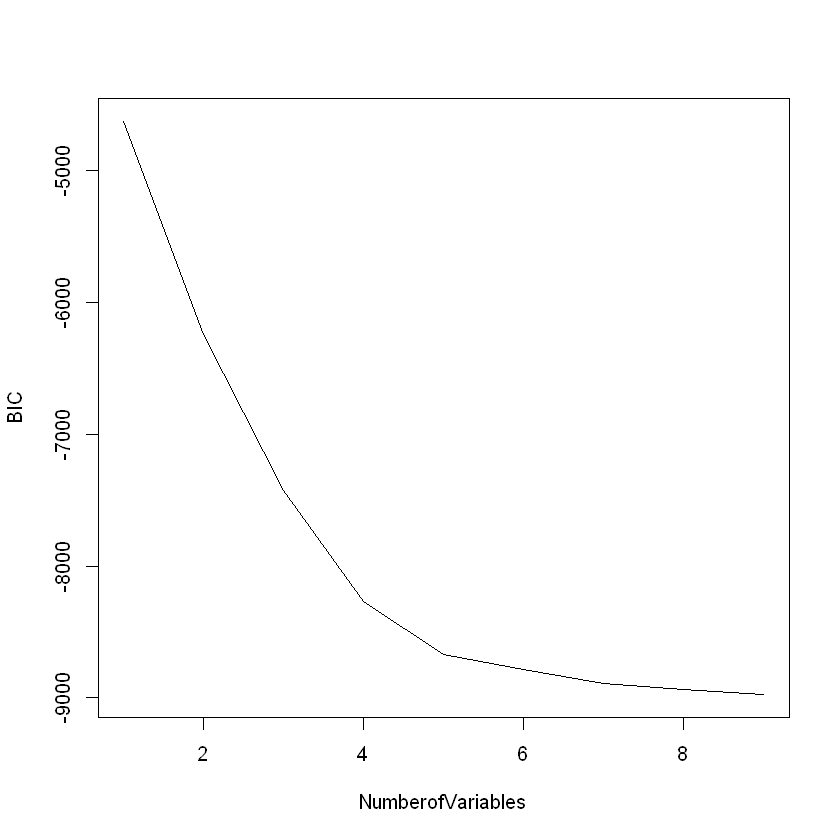

In [20]:
#Variável alvo price_log
sel_variaveis <- treino
sel_variaveis$id <- NULL
sel_variaveis$price <- NULL

regfit.fwd.log=regsubsets(price_log~.,data=sel_variaveis, method="forward")
#summary(regfit.fwd.log)


reg.summary.fwd.log = summary ( regfit.fwd.log)

#Variável alvo price
#regfit.fwd=regsubsets(price~.,data=a,method="forward")

#par(mfrow=c(2,2))
plot(reg.summary.fwd.log$rss,xlab="NumberofVariables",ylab="RSS",
     type="l")
plot(reg.summary.fwd.log$adjr2,xlab="NumberofVariables",
     ylab="AdjustedRSq",type="l")
plot(reg.summary.fwd.log$cp,xlab="NumberofVariables",ylab="Cp",
     type='l')
plot(reg.summary.fwd.log$bic,xlab="NumberofVariables",ylab="BIC",
     type='l')

reg.summary.fwd.log

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"1  linear dependencies found"

Reordering variables and trying again:


[1] 0.3299950 0.4365126 0.4982423 0.5257946 0.5387632 0.5457226 0.5500134
 [8] 0.5516376 0.5535966 0.5542118 0.5547445 0.5552452 0.5555768

numeric(0)

numeric(0)

numeric(0)

numeric(0)

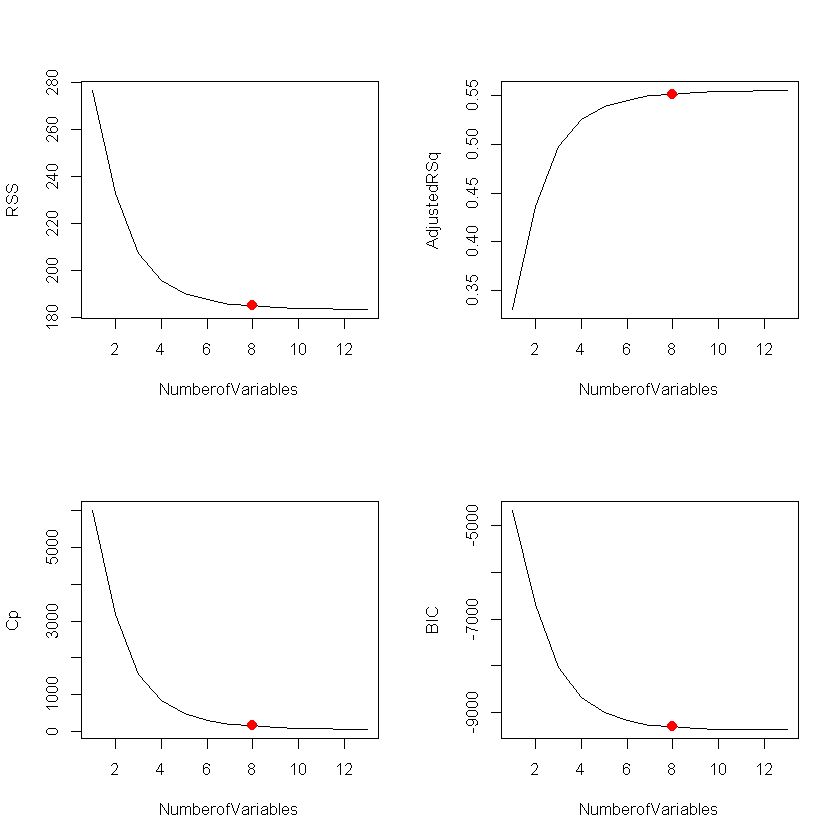

In [21]:
#Variável alvo price

#Variável alvo price_log
sel_variaveis <- treino
sel_variaveis$id <- NULL
sel_variaveis$price_log <- NULL

regfit.fwd.pr =regsubsets(price~.,data=sel_variaveis, method="forward", nvmax=12)
#summary(regfit.fwd.log)

reg.summary.fwd.pr = summary ( regfit.fwd.pr)

reg.summary.fwd.pr$adjr2
#Variável alvo price
#regfit.fwd=regsubsets(price~.,data=a,method="forward")

par(mfrow=c(2,2))
plot(reg.summary.fwd.pr$rss,xlab="NumberofVariables",ylab="RSS",
     type="l") +
points (8, reg.summary.fwd.pr$rss [8] , col =" red ", cex =2, pch =20)

plot(reg.summary.fwd.pr$adjr2,xlab="NumberofVariables",
     ylab="AdjustedRSq",type="l") +
points (8, reg.summary.fwd.pr$adjr2 [8] , col =" red ", cex =2, pch =20)

plot(reg.summary.fwd.pr$cp,xlab="NumberofVariables",ylab="Cp",
     type='l') +
points (8, reg.summary.fwd.pr$cp [8] , col =" red ", cex =2, pch =20)

plot(reg.summary.fwd.pr$bic,xlab="NumberofVariables",ylab="BIC",
     type='l') +
points (8, reg.summary.fwd.pr$bic [8] , col =" red ", cex =2, pch =20)



In [22]:

reg.summary.fwd.pr$adj.r.squared

NULL

# Regressão com as variáveis preditivas indicadas pelo stepwise

In [23]:

resmodelo1<-lm(price ~  bathrooms+ sqft_above+ sqft_basement+ sqft_living15+ yr_built_log+view+ grade+ sqft_lot15_log, data= treino)
sm.resmodelo1 <- summary(resmodelo1)

sm.resmodelo1$r.squared
sm.resmodelo1


[1] 0.5480817


Call:
lm(formula = price ~ bathrooms + sqft_above + sqft_basement + 
    sqft_living15 + yr_built_log + view + grade + sqft_lot15_log, 
    data = treino)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52775 -0.08641 -0.00602  0.07541  0.61113 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.186513   0.007359  25.346  < 2e-16 ***
bathrooms       0.051836   0.008042   6.446 1.19e-10 ***
sqft_above      0.241633   0.011572  20.880  < 2e-16 ***
sqft_basement   0.118814   0.005749  20.668  < 2e-16 ***
sqft_living15   0.183489   0.010603  17.306  < 2e-16 ***
yr_built_log   -0.305725   0.006092 -50.181  < 2e-16 ***
view            0.108701   0.008588  12.658  < 2e-16 ***
grade           0.631244   0.013539  46.625  < 2e-16 ***
sqft_lot15_log -0.221946   0.007889 -28.134  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1263 on 11688 degrees of freedom
Multiple R-squared:  0.5481

# Validação com a base de teste.

In [24]:

preco2<-predict(resmodelo1,newdata= preco_casas.teste )
SS.total      <- sum((preco_casas.teste$price - mean(preco_casas.teste$price))^2)
SS.residual   <- sum((preco_casas.teste$price - preco2)^2)
SS.regression <- sum((preco2 - mean(preco_casas.teste$price))^2)
#SS.total - (SS.regression+SS.residual)
1-SS.residual/SS.total  

[1] 0.5678945